In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import plotly.express as px
from nltk.probability import FreqDist
nltk.download("stopwords")
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kerim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data= pd.read_csv("IMDB Dataset.csv")

In [3]:
data

review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
37389  While the sparkling chemistry between Ryan and...  positive
37390  After two brief scenes that at first seem unre...  positive
37391  hi<br /><br />Blade is an sensational action m...  positive
37392  A young couple decides to runaway to sunny Cal...  negative
37393  Those who have given this production such a lo...  positive

[37394 rows x 2 columns]

In [4]:
data['sentiment'].value_counts()

sentiment
negative    18709
positive    18685
Name: count, dtype: int64

Text(0.5, 1.0, 'Sentiment distribution')

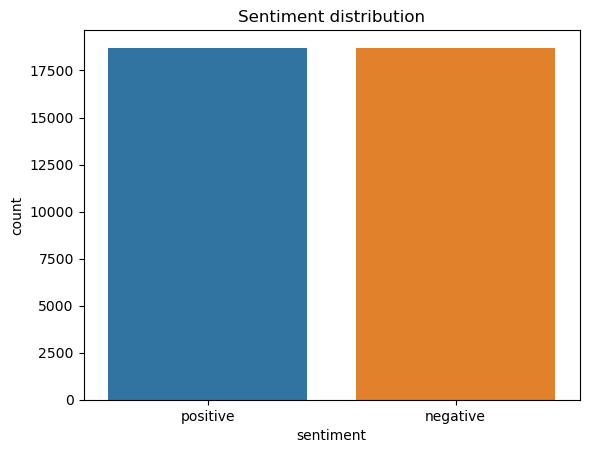

In [5]:
#to see the distribution between positive and negative reviews
sns.countplot(x='sentiment', data=data)
plt.title("Sentiment distribution")

In [6]:
for i in range(5):
    print("Review", [i])
    print(data['review'].iloc[i], "\n")
    print("Sentiment:", data['sentiment'].iloc[i], "\n\n")

Review [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due

In [7]:
def num_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [8]:
data['Number of words'] = data['review'].apply(num_of_words)
data

review sentiment  \
0      One of the other reviewers has mentioned that ...  positive   
1      A wonderful little production. <br /><br />The...  positive   
2      I thought this was a wonderful way to spend ti...  positive   
3      Basically there's a family where a little boy ...  negative   
4      Petter Mattei's "Love in the Time of Money" is...  positive   
...                                                  ...       ...   
37389  While the sparkling chemistry between Ryan and...  positive   
37390  After two brief scenes that at first seem unre...  positive   
37391  hi<br /><br />Blade is an sensational action m...  positive   
37392  A young couple decides to runaway to sunny Cal...  negative   
37393  Those who have given this production such a lo...  positive   

       Number of words  
0                  307  
1                  162  
2                  166  
3                  138  
4                  230  
...                ...  
37389              126  
37390              993  
37391               81  
37392              443  
37393              617  

[37394 rows x 3 columns]

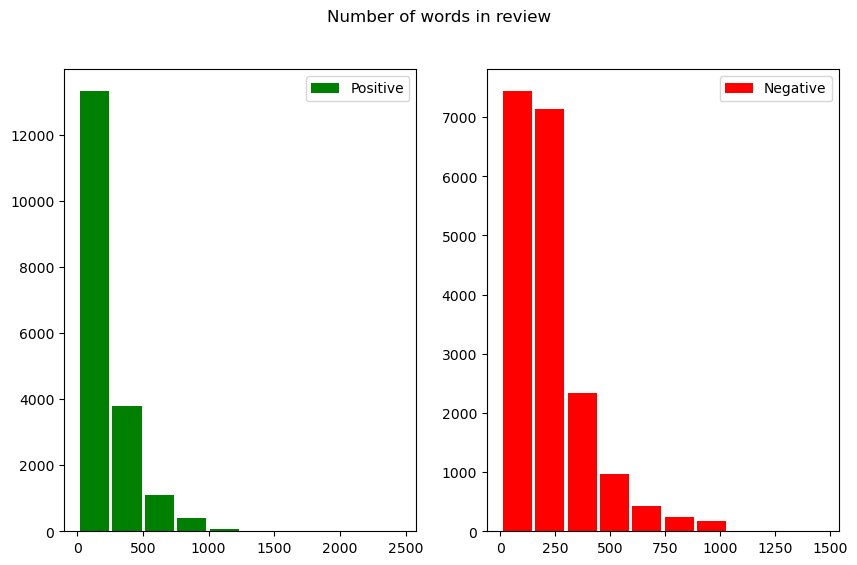

In [9]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(data[data['sentiment'] == 'positive']['Number of words'], label='Positive', color='green', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(data[data['sentiment'] == 'negative']['Number of words'], label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

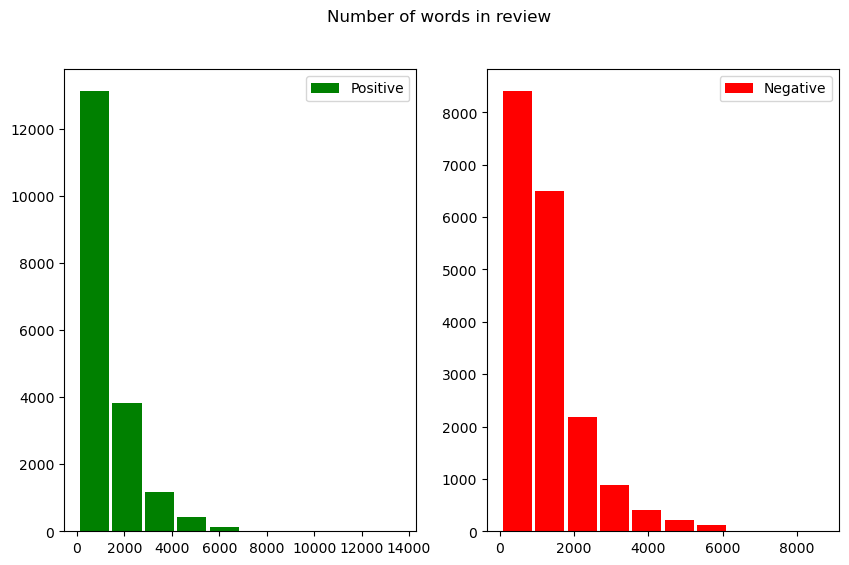

In [10]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(data[data['sentiment'] == 'positive']['review'].str.len(), label='Positive', color='green', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(data[data['sentiment'] == 'negative']['review'].str.len(), label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

In [11]:
#def clean_review(review):
 #   str = ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
  #  return str

In [12]:
#data['review'] = data['review'].apply(clean_review)

In [13]:
#data['review']

In [14]:
from wordcloud import WordCloud

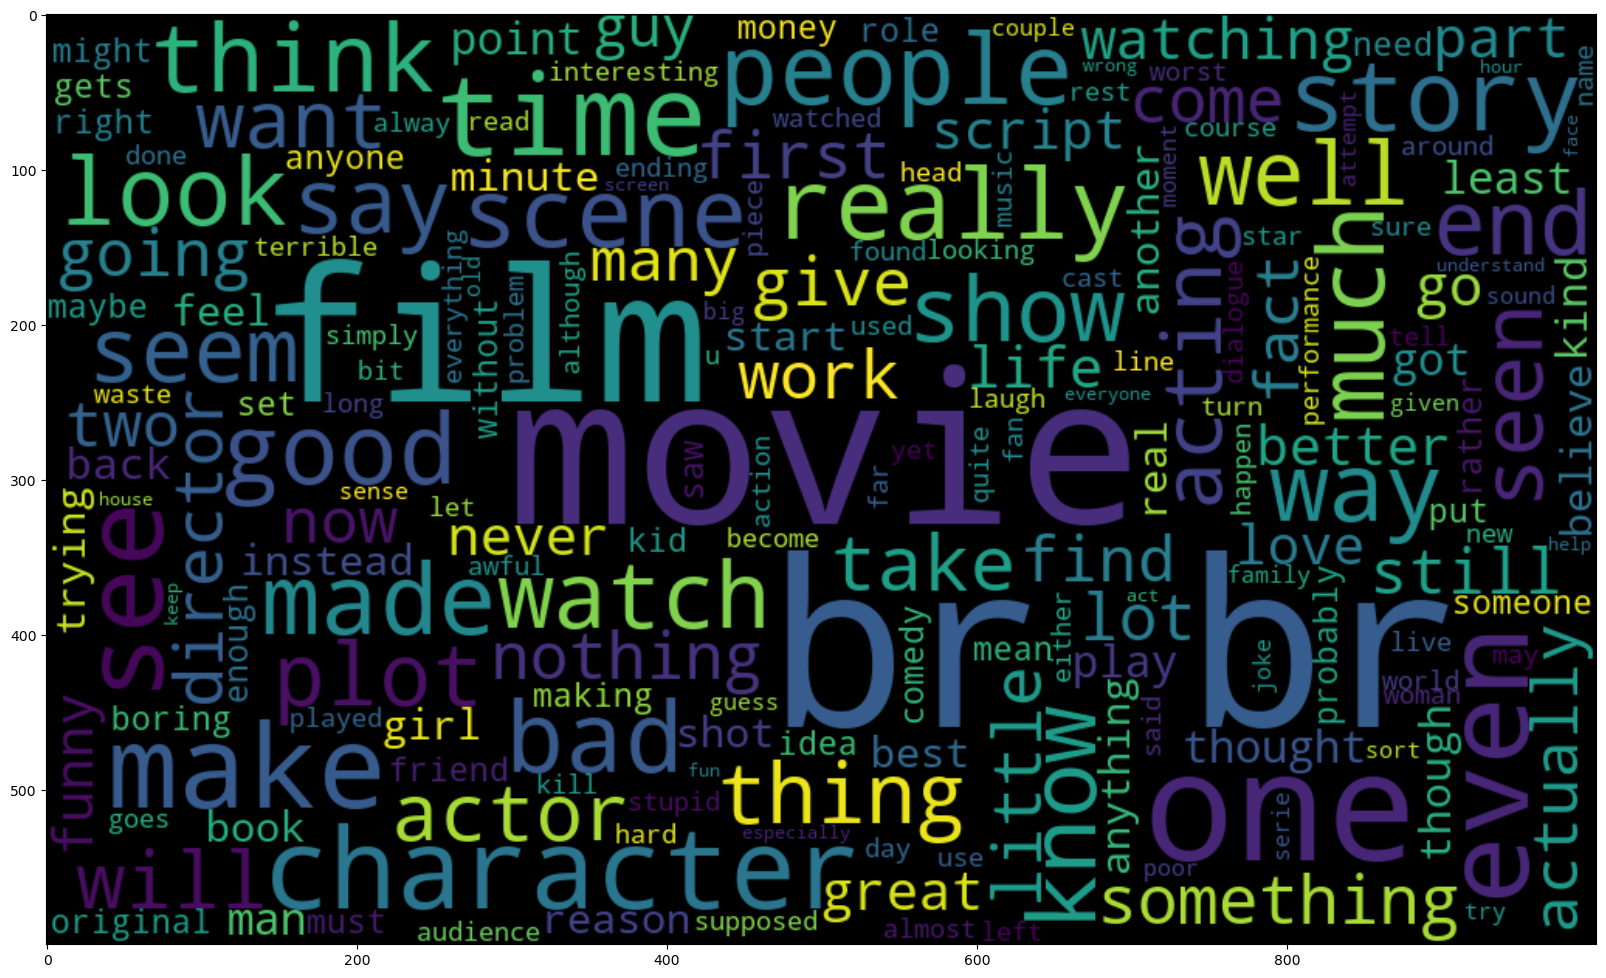

In [15]:
#most occuring words in the negative review
reviews=' '.join(word for word in data['review'][data['sentiment']=='negative'].astype(str))
wordcloud = WordCloud(height=600, width=1000, max_font_size=150)
plt.figure(figsize=(20,15))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.show()


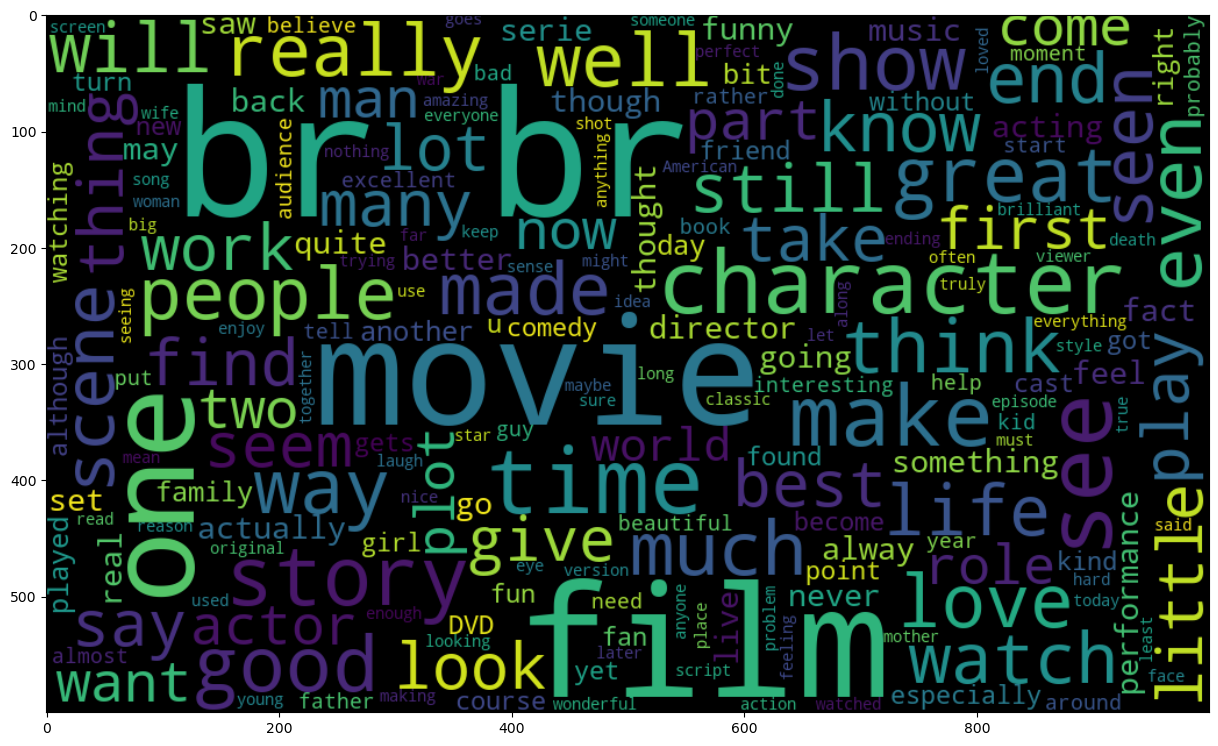

In [16]:
#most occuring words in the positive review
reviews=' '.join(word for word in data['review'][data['sentiment']=='positive'].astype(str))
wordcloud = WordCloud(height=600, width=1000, max_font_size=150)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.show()


In [17]:
#Function for cleaning the dataset
def data_cleaning(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stopwords.words('english')]
    return " ".join(filtered_text)

In [18]:
#duplicated reviews
duplicated_count = data.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  236


In [19]:
data=data.drop_duplicates('review')

In [20]:
#Set positive and negative result as 1 and 0
data['sentiment']= data['sentiment'].replace(['positive', 'negative'],[1,0])

C:\Users\kerim\AppData\Local\Temp\ipykernel_9228\2900104161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment']= data['sentiment'].replace(['positive', 'negative'],[1,0])


In [21]:
data['sentiment'].value_counts()

sentiment
1    18621
0    18537
Name: count, dtype: int64

In [22]:
data

review  sentiment  \
0      One of the other reviewers has mentioned that ...          1   
1      A wonderful little production. <br /><br />The...          1   
2      I thought this was a wonderful way to spend ti...          1   
3      Basically there's a family where a little boy ...          0   
4      Petter Mattei's "Love in the Time of Money" is...          1   
...                                                  ...        ...   
37389  While the sparkling chemistry between Ryan and...          1   
37390  After two brief scenes that at first seem unre...          1   
37391  hi<br /><br />Blade is an sensational action m...          1   
37392  A young couple decides to runaway to sunny Cal...          0   
37393  Those who have given this production such a lo...          1   

       Number of words  
0                  307  
1                  162  
2                  166  
3                  138  
4                  230  
...                ...  
37389              126  
37390              993  
37391               81  
37392              443  
37393              617  

[37158 rows x 3 columns]

In [23]:
#apply the cleaning function
data['review'] = data['review'].apply(data_cleaning)

C:\Users\kerim\AppData\Local\Temp\ipykernel_9228\2762796104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['review'] = data['review'].apply(data_cleaning)


In [24]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data


In [25]:
data.review = data['review'].apply(lambda x: stemming(x))

C:\Users\kerim\AppData\Local\Temp\ipykernel_9228\1664729610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.review = data['review'].apply(lambda x: stemming(x))


In [26]:
#after the stemming the number of words has decreased
data['Number of words'] = data['review'].apply(num_of_words)
data.head()

C:\Users\kerim\AppData\Local\Temp\ipykernel_9228\717888406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Number of words'] = data['review'].apply(num_of_words)


review  sentiment  \
0  one reviewers mentioned watching 1 oz episode ...          1   
1  wonderful little production filming technique ...          1   
2  thought wonderful way spend time hot summer we...          1   
3  basically theres family little boy jake thinks...          0   
4  petter matteis love time money visually stunni...          1   

   Number of words  
0              168  
1               84  
2               86  
3               67  
4              125

In [27]:
#positive reviews
pos_reviews =  data[data.sentiment == 1]
pos_reviews.head()

review  sentiment  \
0  one reviewers mentioned watching 1 oz episode ...          1   
1  wonderful little production filming technique ...          1   
2  thought wonderful way spend time hot summer we...          1   
4  petter matteis love time money visually stunni...          1   
5  probably alltime favorite movie story selfless...          1   

   Number of words  
0              168  
1               84  
2               86  
4              125  
5               58

In [28]:
#negative reviews
negative_reviews =  data[data.sentiment == 0]
negative_reviews.head()

review  sentiment  \
3   basically theres family little boy jake thinks...          0   
7   show amazing fresh innovative idea 70s first a...          0   
8   encouraged positive comments film looking forw...          0   
10  phil alien one quirky films humour based aroun...          0   
11  saw movie 12 came recall scariest scene big bi...          0   

    Number of words  
3                67  
7                83  
8                64  
10               51  
11               84

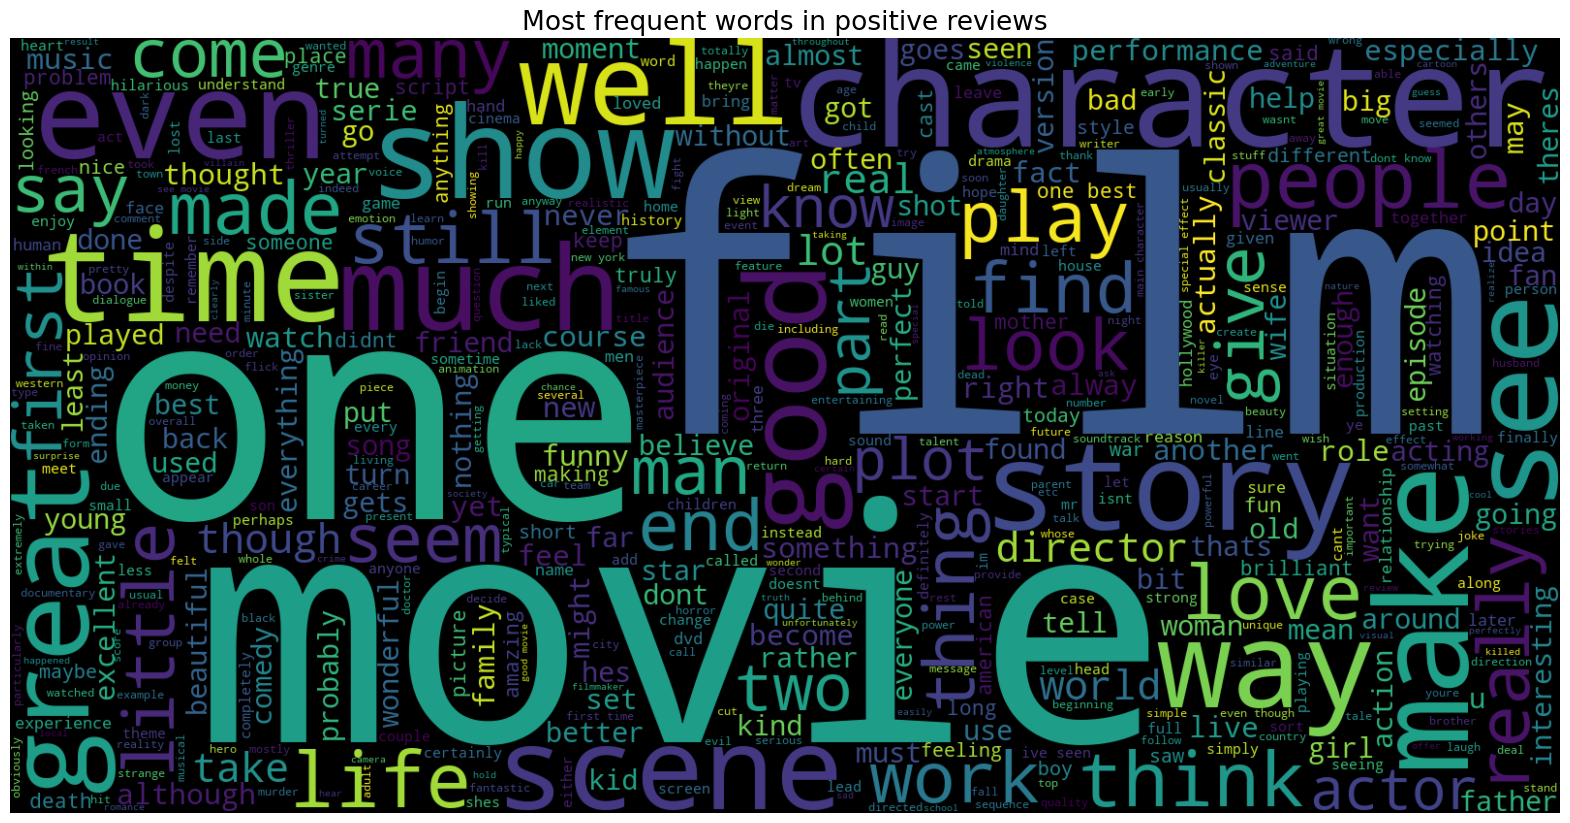

In [29]:
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

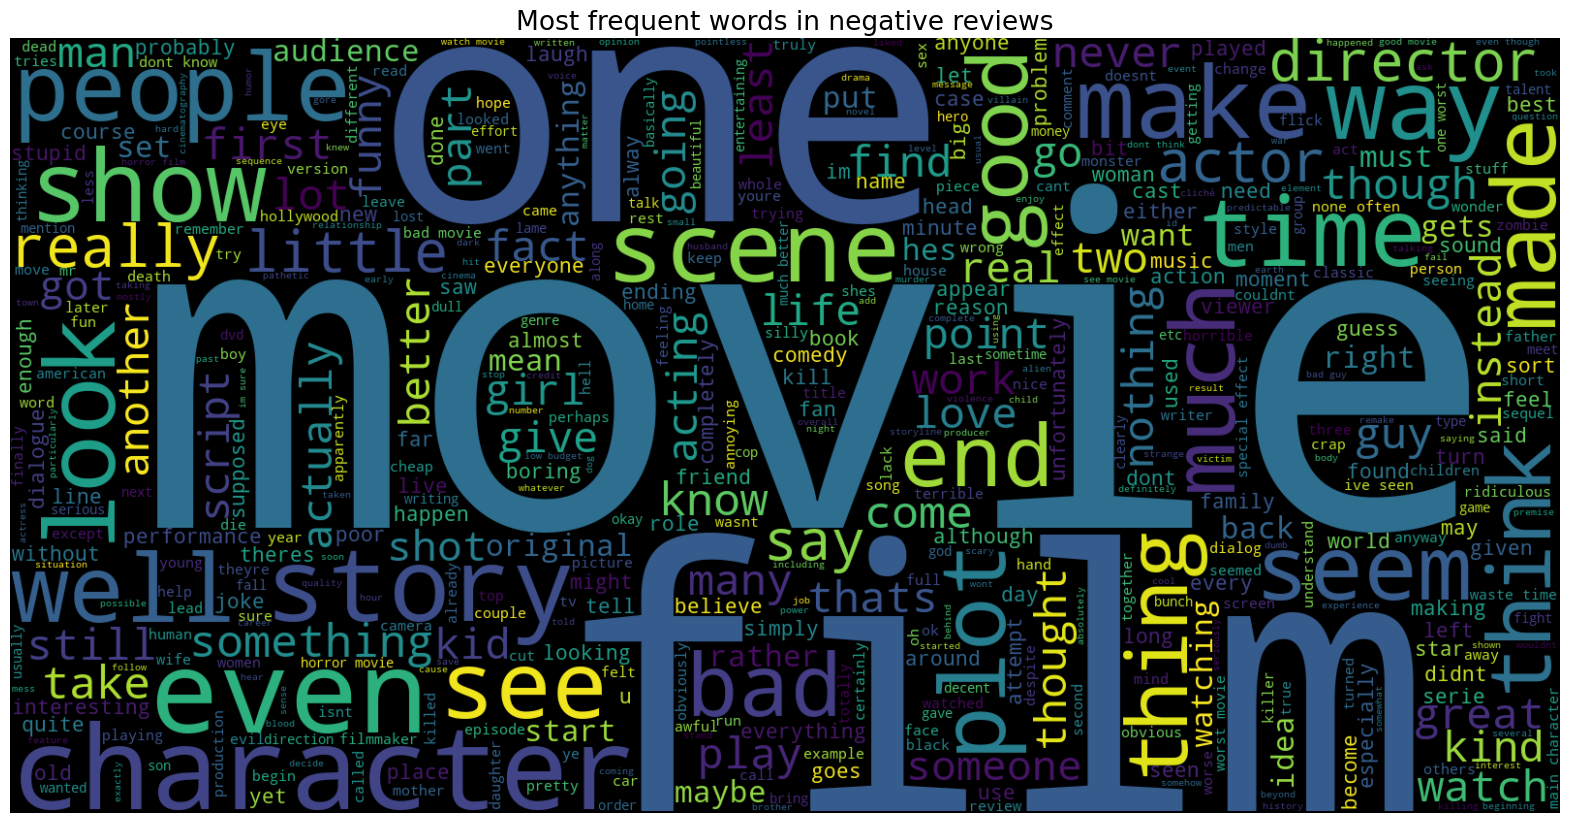

In [30]:
text = ' '.join([word for word in negative_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [31]:
#for postive reviews
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('film', 29375),
 ('movie', 26994),
 ('one', 19197),
 ('like', 12674),
 ('good', 10779),
 ('great', 9328),
 ('story', 9185),
 ('see', 8814),
 ('time', 8774),
 ('well', 8204),
 ('really', 7949),
 ('also', 7835),
 ('would', 7765),
 ('even', 6973),
 ('much', 6713)]

In [32]:
#for negative reviews
count = Counter()
for text in negative_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('movie', 35173),
 ('film', 26012),
 ('one', 18164),
 ('like', 16154),
 ('even', 11163),
 ('good', 10583),
 ('bad', 10423),
 ('would', 10102),
 ('really', 9002),
 ('time', 8520),
 ('see', 7840),
 ('dont', 7468),
 ('get', 7457),
 ('much', 7324),
 ('story', 7152)]

In [33]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words

word  count
0    movie  35173
1     film  26012
2      one  18164
3     like  16154
4     even  11163
5     good  10583
6      bad  10423
7    would  10102
8   really   9002
9     time   8520
10     see   7840
11    dont   7468
12     get   7457
13    much   7324
14   story   7152

In [34]:
negative_reviews = pd.DataFrame(count.most_common(15))
negative_reviews.columns = ['word', 'count']
negative_reviews

word  count
0    movie  35173
1     film  26012
2      one  18164
3     like  16154
4     even  11163
5     good  10583
6      bad  10423
7    would  10102
8   really   9002
9     time   8520
10     see   7840
11    dont   7468
12     get   7457
13    much   7324
14   story   7152

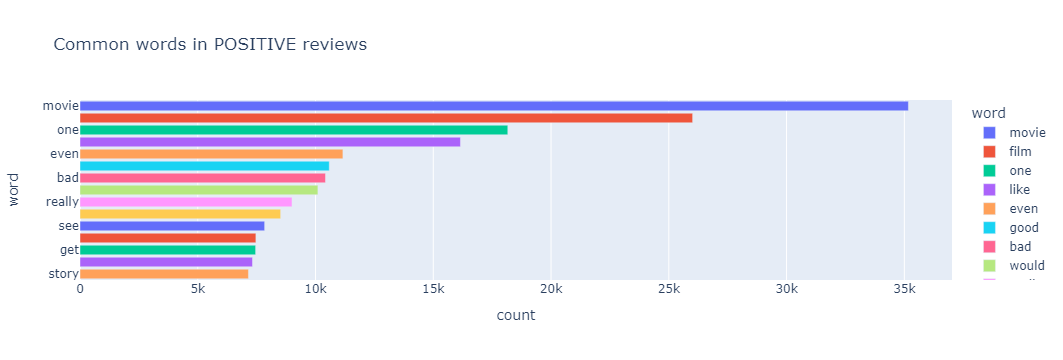

In [35]:
px.bar(pos_words, x='count', y='word', title='Common words in POSITIVE reviews', color = 'word')

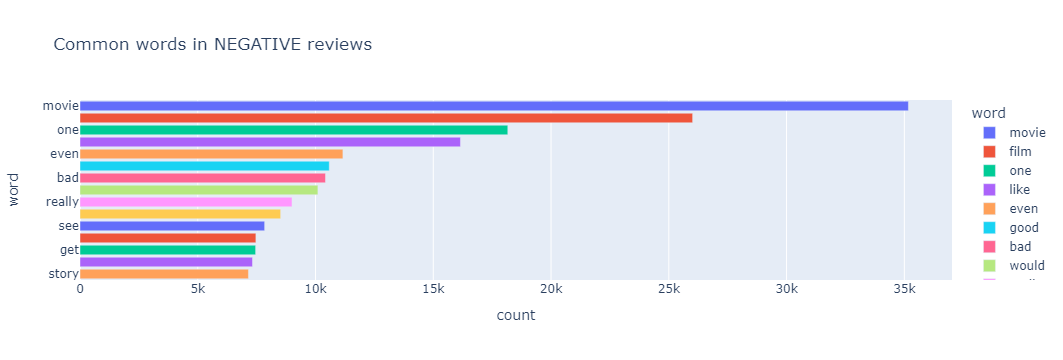

In [36]:
px.bar(negative_reviews, x='count', y='word', title='Common words in NEGATIVE reviews', color = 'word')

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [38]:
X = data['review']
Y = data['sentiment']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [40]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [41]:
model = MultinomialNB()
model.fit(X_train_vectorized, Y_train)

MultinomialNB()

In [42]:
predictions = model.predict(X_test_vectorized)

In [43]:
# Evaluate the model's performance
accuracy = accuracy_score(Y_test, predictions)
print("Test accuracy: {:.2f}%".format(accuracy*100))

Test accuracy: 85.82%


In [44]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      5533
           1       0.87      0.84      0.86      5615

    accuracy                           0.86     11148
   macro avg       0.86      0.86      0.86     11148
weighted avg       0.86      0.86      0.86     11148



In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predictions)

In [47]:
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[4839  694]
 [ 887 4728]]


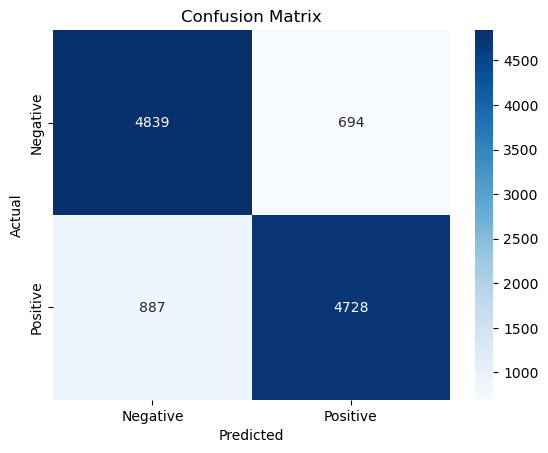

In [48]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [72]:
new_review = "This movie is bad but i liked some parts!."


# Preprocess and vectorize the new review
new_review_preprocessed = data_cleaning(new_review)
new_review_vectorized = vectorizer.transform([new_review_preprocessed])

# Assuming 'model' is your trained sentiment analysis model
# Make prediction
prediction = model.predict(new_review_vectorized)
print (prediction[0])

# Interpret the prediction
if prediction[0] == 1:
    print("The model predicts that the review is positive!")
else:
    print("The model predicts that the review is negative.")

0
The model predicts that the review is negative.


In [73]:
import pickle as pk

In [74]:
pk.dump(model, open('model.pkl','wb'))

In [76]:
pk.dump(vectorizer, open('vectorizer.pkl','wb'))